In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_fwf("BerkeleyEarth Air Temperatures over Land (Modified File).txt", skiprows=1)
df.drop(columns=['Anomaly, Unc.,.1', 'Anomaly, Unc.,.2', 'Anomaly, Unc.,.3', 'Anomaly,', 'Unc.'], inplace=True)
df.rename(columns={'Year,':'Year', 'Month,':'Month', 'Anomaly, Unc.,': 'Combined'}, inplace=True)
df['Combined2'] = df['Combined'].str.split(' ')

In [3]:
monthlyanomaly = []
for r in range(len(df)):
    monthlyanomaly.append(float(df.loc[r]['Combined2'][0]))
df['Monthly Temperature Anomaly'] = monthlyanomaly
df.drop(columns=['Combined', 'Combined2'], inplace=True)
df.interpolate(method='linear', inplace=True)

In [49]:
df.to_csv("Monthly Temperature Anomalies (1750-2022)")

In [4]:
year = list(set(list(df['Year'])))
annualanomaly = []
anomalyaverager = []
for i in df['Monthly Temperature Anomaly']:
    anomalyaverager.append(i)
    if len(anomalyaverager) == 12:
        annualanomaly.append(sum(anomalyaverager)/12)
        anomalyaverager = []
df2 = pd.DataFrame(list(zip(year, annualanomaly)), columns=['Year', 'Annual Average Temperature Anomaly (celsius)'])

In [5]:
df2.to_csv("Annual Temperature Anomalies (1750-2022)")

<AxesSubplot:xlabel='Year'>

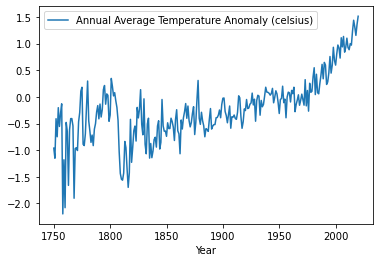

In [6]:
df2.plot(x='Year', y=['Annual Average Temperature Anomaly (celsius)'])